In [1]:
import os
import sys
print("Python version: ",sys.version)
print("Version info:   ",sys.version_info)

# add path to get to the modules renderneuron and parallelframe
sys.path.insert(0,'../src/')
import neuronswc as ns
import neuronmeshgenerator as nmg
import networkx as nx

Python version:  3.8.10 (default, Mar 13 2023, 10:26:41) 
[GCC 9.4.0]
Version info:    sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
JSON:            2.0.9
networkx:        3.1
scipy:           1.10.1


In [2]:
neuron_filename='../cells/0-2a.CNG.swc'
G=ns.read_1d_neuron_swc(neuron_filename)
# remove the soma_line
G=ns.remove_soma_line(G)
# get neuron trunks
trunks,T=ns.get_trunks(G)
ns.write_1d_ugx(T,'trunks.ugx')

Saved to  trunks.ugx


In [10]:
import matplotlib.pyplot as plt
import numpy as np
x=[]; y=[]; z=[];
for i in trunks[1]:
    pos=G.nodes[i]['pos']
    x.append(pos[0]); y.append(pos[1]); z.append(pos[2])

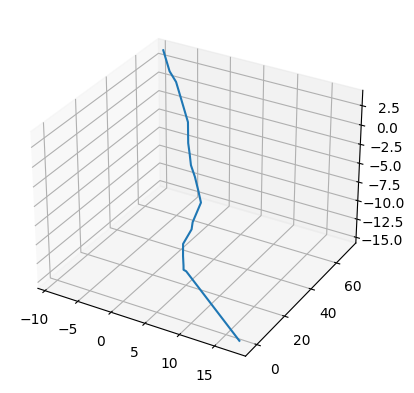

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

In [16]:
# create a new array to hold the norm (distance along path)
npts = len(x)
s = np.zeros(npts, dtype=float)
for j in range(1, npts):
    dx = x[j] - x[j-1]
    dy = y[j] - y[j-1]
    dz = z[j] - z[j-1]
    vec = np.array([dx, dy, dz])
    s[j] = s[j-1] + np.linalg.norm(vec)

# create a new data with finer coords 
xvec = np.linspace(s[0], s[-1], 10)

# Call the Scipy cubic spline interpolator
from scipy import interpolate 

# Create new interpolation function for each axis against the norm 
f1 = interpolate.interp1d(s, x, kind='cubic')
f2 = interpolate.interp1d(s, y, kind='cubic')
f3 = interpolate.interp1d(s, z, kind='cubic')

# create new fine data curve based on xvec
xs = f1(xvec)
ys = f2(xvec)
zs = f3(xvec)

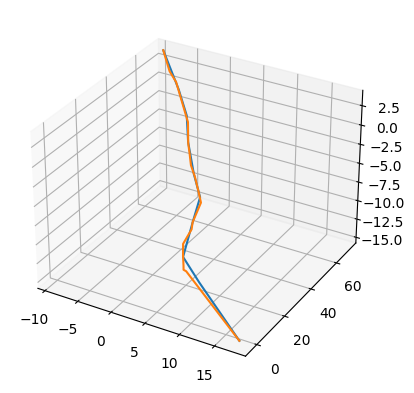

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs)
ax.plot(x,y,z)
plt.show()